# 중심을 대표하는 값

## 평균

In [2]:
import numpy as np

# 산술평균
data = [10, 20, 30, 40, 50]
mean_value = np.mean(data)
print(mean_value)  # 30.0

30.0


In [ ]:
# 기하평균 - n개의 관측치를 모두 곱해 n제곱근으로 표현
from scipy.stats import hmean, gmean
gmean(data)

np.float64(26.051710846973528)

In [19]:
# 조화평균 - 역수들의 산술평균을 구해 다시 역수
hmean(data)

np.float64(2.285714285714286)

In [5]:
# 가중평균 - 값에 가중치를 부여하여 계산 (중요도가 다를 때)

# 가격과 개수
prices = [5000, 9000]
counts = [8, 2]

# (5000 * 8 + 9000 * 2) / (8 + 2)
np.average(prices, weights=counts)

np.float64(5800.0)

## 중앙값

- 이상치(outlier)의 영향을 덜 받음
- 짝수 개의 값들이 있을 때 중앙값은 중간에 있는 두 값의 평균을 구함

In [6]:
data

[10, 20, 30, 40, 50]

In [7]:
np.median(data)

np.float64(30.0)

In [14]:
# 백분위수

scores = [15, 75, 80, 85, 95]
p25 = np.percentile(scores, 25)  # Q1
p50 = np.percentile(scores, 50)  # Q2 - median
p75 = np.percentile(scores, 75)  # Q3

print(p25, p50, p75)

75.0 80.0 85.0


In [15]:
# IQR : 사분위범위 
# -> Q3 ~ Q1 = 85 - 75 = 10
p75 - p25

np.float64(10.0)

중앙값이나 분위수는 개수(위치)를 중요시하는 통계량   
-> 이상값/극단적인 값이 중요하지 않음

## 최빈값

- 가장 자주 나타나는 값
- 연속형 데이터보다는 범주형 데이터에서 더 유용하게 사용

In [12]:
import pandas as pd

In [16]:
data = pd.Series([1, 2, 2, 3, 3, 3, 4, 4])
data.mode()   # 가장 많이 등장한 값

0    3
dtype: int64

# 변동 (산포) - 데이터의 퍼짐 정도 측정

### 변동성(variability, spread 또는 dispersion)
값들이 서로 얼마나 다른지를 나타내는 개념이고 측정하는 기준이다.

### 범위

가장 일반적으로 사용되는 변동성(variability) 측정치  
- 분포 내의 가장 높은 점수에서 가장 낮은 점수를 뺀 값으로 계산
- 최대/최소 2개의 값만 사용
- 실제 데이터가 어떤 값들로 구성되어있는 지를 설명할 수 없음


In [20]:
data = [10, 20, 30, 40, 50]
range_value = max(data) - min(data)
print(range_value)  # 40

40


범위 값이 클수록 데이터의 변동이 크다는 의미   
극단값(outlier)에 민감

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

vp_df = sns.load_dataset('iris')
vp_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
# sepal_length의 범위
vp_df['sepal_length'].max() - vp_df['sepal_length'].min()

np.float64(3.6000000000000005)

In [37]:
# 모든 속성의 범위 확인 (반복문)
for i in vp_df.select_dtypes(include='number').columns:
    print(vp_df[[i]].max() - vp_df[[i]].min())

sepal_length    3.6
dtype: float64
sepal_width    2.4
dtype: float64
petal_length    5.9
dtype: float64
petal_width    2.4
dtype: float64


변동성이 가장 큰 속성은 petal_length   
petal_length와 petal_width가 sepal_length와   
sepal_width보다 상대적으로 변동성이 크다.

모델 생성시에 다루어야하는 속성으로 볼 수 있음

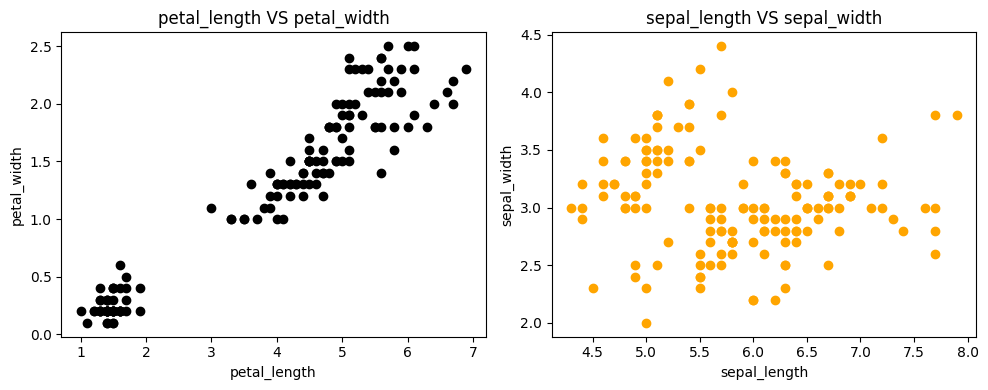

In [69]:
# 산포도로 변동성 확인하기

plt.figure(figsize=(10, 4))

# petal_length와 petal_width
plt.subplot(1, 2, 1)
plt.scatter(vp_df['petal_length'], vp_df['petal_width'], c='k')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('petal_length VS petal_width')

# sepal_length와 sepal_width
plt.subplot(1, 2, 2)
plt.scatter(vp_df['sepal_length'], vp_df['sepal_width'], c='orange')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('sepal_length VS sepal_width')

plt.tight_layout()

산포도를 이용해 극단적으로 다른 데이터(이상치)가 있는지 확인해볼 필요!

## 분산

평균을 중심으로 데이터가 밀집되거나 퍼져 있는 정도

In [65]:
data = [10, 20, 30, 40, 50]
variance_value = np.var(data)
print(variance_value)  # 200.0

200.0


## 표준편차(Standard Deviation)

어떤 표준(standard)으로 부터 벗어난(deviate) 정도

In [70]:
std_dev = np.std(data)
print(std_dev)  # 14.14

14.142135623730951


### 표준 편차 비교

In [71]:
# sd의 비교
import numpy as np
import matplotlib.pyplot as plt

# 평균과 표준편차 설정
mu = 100    # 모집단의 평균
sd1 = 10
sd2 = 50

# 정규분포 데이터 생성
data1 = np.random.normal(mu, sd1, 10000)
data2 = np.random.normal(mu, sd2, 10000)

In [73]:
bins = np.arange(1, 240, 10)
bins

array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231])

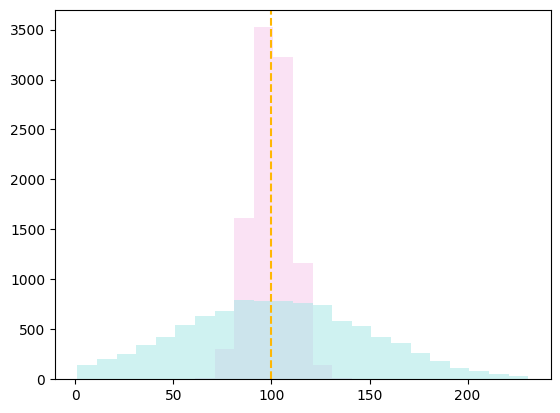

In [96]:
plt.hist(data1, bins=bins, color='#F6C6EA', alpha=0.5)
plt.hist(data2, bins=bins, color='#A0E7E5', alpha=0.5)

# 평균선 표시
plt.axvline(mu, color='#FFB703', linestyle='--')

In [83]:
# iris dataset의 속성들의 표준편차 비교분석
vp_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

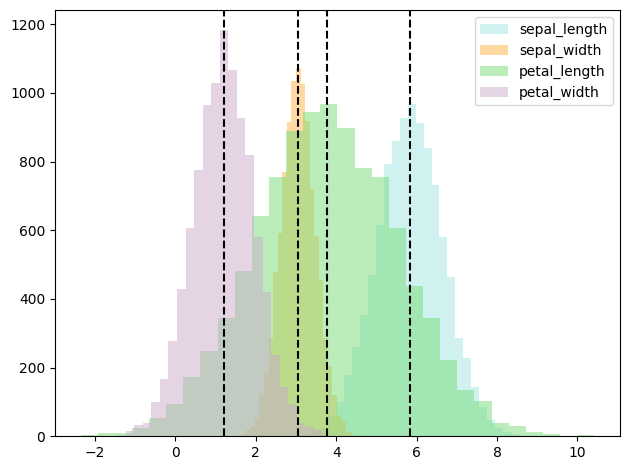

In [126]:
sl_avg = vp_df['sepal_length'].mean()
sl_std = vp_df['sepal_length'].std()
sl_data = np.random.normal(sl_avg, sl_std, 10000)
plt.hist(sl_data, bins=30, color='#A0E7E5', alpha=0.5, label='sepal_length')
plt.axvline(sl_avg, linestyle='--', color='k')
plt.legend()

sw_avg = vp_df['sepal_width'].mean()
sw_std = vp_df['sepal_width'].std()
sw_data = np.random.normal(sw_avg, sw_std, 10000)
plt.hist(sw_data, bins=30, color='#FFB347', alpha=0.5, label='sepal_width')
plt.axvline(sw_avg, linestyle='--', color='k')
plt.legend()

pl_avg = vp_df['petal_length'].mean()
pl_std = vp_df['petal_length'].std()
pl_data = np.random.normal(pl_avg, pl_std, 10000)
plt.hist(pl_data, bins=30, color='#77DD77', alpha=0.5, label='petal_length')
plt.axvline(pl_avg, linestyle='--', color='k')
plt.legend()

pw_avg = vp_df['petal_width'].mean()
pw_std = vp_df['petal_width'].std()
pw_data = np.random.normal(pw_avg, pw_std, 10000)
plt.hist(pw_data, bins=30, color='#CBAACB', alpha=0.5, label='petal_width')
plt.axvline(pw_avg, linestyle='--', color='k')
plt.legend()

plt.tight_layout()

## 사분위범위

In [125]:
numeric_df = vp_df.select_dtypes(include=['float64', 'int'])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)

IQR = Q3 - Q1

summ = pd.DataFrame({'Q1': Q1,
                    'Q3': Q3,
                    'IQR': IQR})

summ

,Q1,Q3,IQR
sepal_length,5.1,6.4,1.3
sepal_width,2.8,3.3,0.5
petal_length,1.6,5.1,3.5
petal_width,0.3,1.8,1.5


가장 분산이 큰 변수: petal_length   
가장 분산이 작은 변수: sepal_width   
품종을 분류할 때, petal_length가 민감하게 작용할 것이다   
-> 식별력이 크다   

** IQR의 크기 -> 이상치의 허용범위가 크다

# 분포의 모양과 형태

- 모양이 정규분포인지
- 치우쳐져 있는지 (좌, 우, 위, 아래)
- 특이한 패턴이 있는지 (쌍봉패턴)

In [139]:
# 빈도분포표

# 데이터 입력
data = [
    [47, 10, 31, 25, 20],
    [2, 11, 31, 25, 21],
    [44, 14, 15, 26, 21],
    [41, 14, 16, 26, 21],
    [7, 30, 17, 27, 24],
    [6, 30, 16, 29, 24],
    [35, 32, 15, 29, 23],
    [38, 33, 19, 28, 20],
    [35, 34, 18, 29, 21],
    [36, 32, 16, 27, 20],
]

# DataFrame으로 변환
df = pd.DataFrame(data, columns=['A', 'B', 'C', 'D', 'E'])
df

,A,B,C,D,E
0,47,10,31,25,20
1,2,11,31,25,21
2,44,14,15,26,21
3,41,14,16,26,21
4,7,30,17,27,24
5,6,30,16,29,24
6,35,32,15,29,23
7,38,33,19,28,20
8,35,34,18,29,21
9,36,32,16,27,20


- 각 변수의 분포 형태 : 5개의 변수
- 값의 범위, 도수가 많은 구간 (count) 빈도
- 이상치 유무

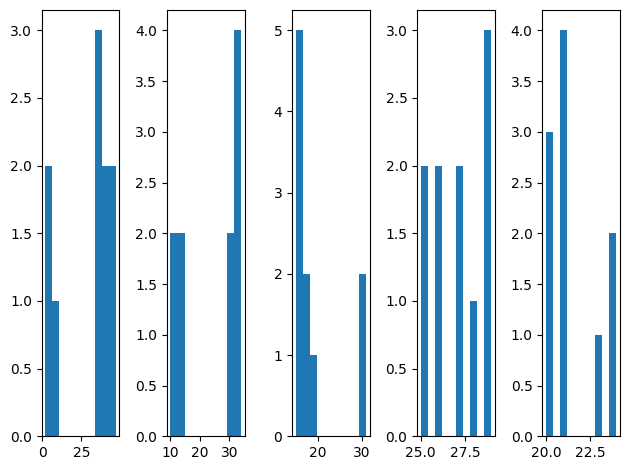

In [140]:
# 각 속성별 히스토그램
for i, col in enumerate(df.columns):
    plt.subplot(1, 5, i + 1)
    plt.hist(df[col])
    plt.tight_layout()

In [141]:
# 첨도 (Kurtosis) : 분포의 뾰족함과 꼬리의 두꺼움을 측정하는 지표

from scipy.stats import kurtosis

kurtosis_value = kurtosis(data)
print(kurtosis_value)

[-1.20858977 -1.72253932  0.04612341 -1.44440419 -1.05185185]


0 : 정규분포   
양수첨도 : 정규분포보다 그만큼 뾰족하다 -> 꼬리가 두껍다 (길다)   
음수첨도 : 정규분포보다 그만큼 눌려있다. -> 꼬리가 얇다 (짧다) => 변동성 크고, 이상치 적음

In [143]:
# iris data로 첨도 계산
vp_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

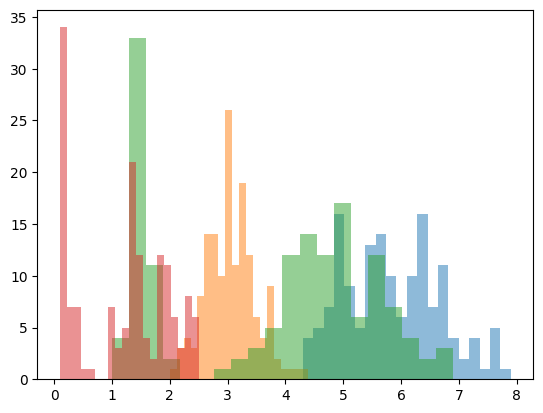

In [154]:
for i in vp_df.select_dtypes(include='number').columns:
    plt.hist(vp_df[i], bins=20, alpha=0.5)

양의 첨도 > 3 => 정규분포보다 뾰족하고 꼬리가 두꺼워 극단적인 값이 더 많다.   
음의 첨도 < 3 => 정규분포보다 평평하고 꼬리가 얇아서 극단적인 값이 덜 발생한다.

In [148]:
for i in vp_df.select_dtypes(include='number').columns:
    print(f'{i} : {kurtosis(vp_df[i])}')

sepal_length : -0.5735679489249765
sepal_width : 0.18097631752246768
petal_length : -1.3955358863990055
petal_width : -1.336067405231553


In [ ]:
# 왜도 (Skewness) : 분포의 비대칭성을 측정하는 지표, 데이터가 좌우 어느 방향으로 치우쳐 있는지 측정

from scipy.stats import skew

skew_value = skew(data)
print(skew_value)  # 양수(오른쪽 꼬리)

[-0.72046984 -0.40821492  1.35807014  0.0034628   0.71111111]


In [155]:
for i in vp_df.select_dtypes(include='number').columns:
    print(f'{i} : {skew(vp_df[i])}')

sepal_length : 0.3117530585022963
sepal_width : 0.31576710633893473
petal_length : -0.2721276664567214
petal_width : -0.10193420656560036
